In [1]:
%matplotlib inline

In [2]:
from parsing import *
cr = CensusReader("data/CometLanding.csv")

File contains 51 invalid rows!
Refining the data given and storing it a new file...
Refined data can be found in 'data/CometLanding_refined.csv'.


In [3]:
from parsing import *

cr = CensusReader("data/CometLanding_refined.csv")
retweets = cr.retweetCount()
replies = cr.replyCount()
tweets = cr.tweetCount()
users = cr.userCount()

print("\nThere were " + str(tweets) + " tweets in total.")
print("There were " + str(replies) + " replies in total.")
print("There were " + str(retweets) + " retweets in total.\n")

print("There were " + str(users) + " users tweeting in the dataset.\n")

print("The average number of tweets by a user in the dataset was " + str(tweets / users) + ".")
print("The average number of replies by a user in the dataset was " + str(replies / users) + ".")
print("The average number of retweets by a user in the dataset was " + str(retweets / users) + ".")


There were 15547 tweets in total.
There were 1723 replies in total.
There were 59998 retweets in total.

There were 50192 users tweeting in the dataset.

The average number of tweets by a user in the dataset was 0.309750557858.
The average number of replies by a user in the dataset was 0.0343281797896.
The average number of retweets by a user in the dataset was 1.1953697800446286.


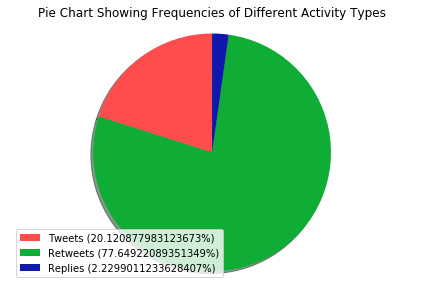

In [4]:
from parsing import *
from plotter import *

cr = CensusReader("data/CometLanding_refined.csv")

retweets = cr.retweetCount()
replies = cr.replyCount()
tweets = cr.tweetCount()

plotter = Plotter()
plotter.pieChart(tweets, retweets, replies)

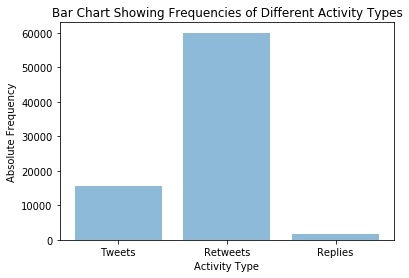

In [5]:
from parsing import *
from plotter import *

cr = CensusReader("data/CometLanding_refined.csv")

retweets = cr.retweetCount()
replies = cr.replyCount()
tweets = cr.tweetCount()


plotter = Plotter()
plotter.barChart(tweets, retweets, replies)

In [6]:
from parsing import *

cr = CensusReader("data/CometLanding_refined.csv")
print(cr.mostPopHashtags(10))

1. #CometLanding : 62752 tweets (of any type)
2. #cometlanding : 13211 tweets (of any type)
3. #67P : 7922 tweets (of any type)
4. #Rosetta : 5912 tweets (of any type)
5. #Philae : 3097 tweets (of any type)
6. #Cometlanding : 1036 tweets (of any type)
7. #WishKoSaPasko : 988 tweets (of any type)
8. #HappyBirthdaySandaraPark : 965 tweets (of any type)
9. #rosetta : 702 tweets (of any type)
10. #esa : 680 tweets (of any type)



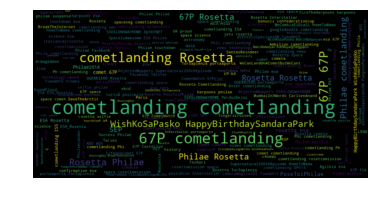

In [7]:
from parsing import *
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = CensusReader("data/CometLanding_refined.csv").data
hashTags = data.loc[:, 'entities_str']
words = []
for i, v in hashTags.iteritems():
    try:
        j = json.loads(v)
        for tag in j['hashtags']:
            if tag['text'] != "CometLanding":
                words.append(tag['text'])
    except TypeError:
        pass

wordcloud = WordCloud(width=1000, height=500).generate(" ".join(words))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
from parsing import *

cr = CensusReader("data/CometLanding_refined.csv")
print (cr.appUsed())


Top Platforms used 
1. ('Twitter Web Client', 27925)
2. ('Twitter for iPhone', 13743)
3. ('Twitter for Android', 12770)
4. ('TweetDeck', 4075)
5. ('Twitter for iPad', 3282)
6. ('dlvr.it', 1671)
7. ('Twitter for Websites', 1462)
8. ('Tweetbot for iÎŸS', 1055)
9. ('Twitter for Windows Phone', 932)
10. ('Tweet Old Post', 925)
11. ('Twitter for Mac', 915)
12. ('Twitter for Android Tablets', 897)
13. ('Hootsuite', 796)
14. ('TweetCaster for Android', 477)
15. ('Ø§Ø´ØªØ±Ø±ÙƒÙ€Ù€Ù€ Ø§Ù„Ø¢Ù†', 356)
16. ('Twitter for BlackBerryÂ®', 345)
17. ('Mobile Web (M5)', 315)
18. ('IFTTT', 303)
19. ('Twitter for BlackBerry', 291)
20. ('Tweetbot for Mac', 289)



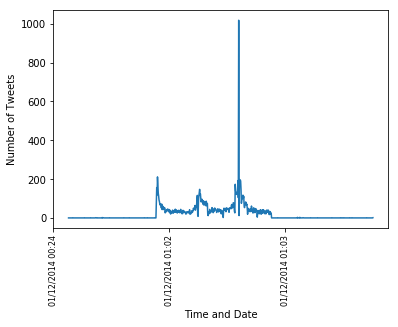

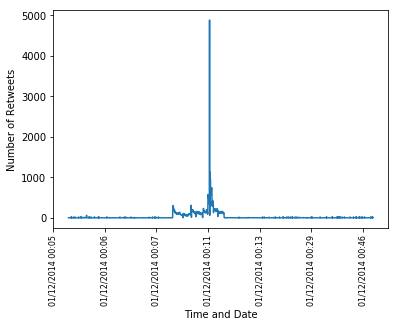

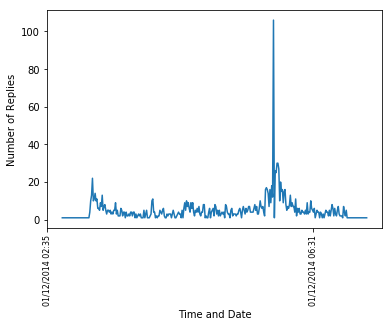

In [9]:
from parsing import *
from plotter import *

cr = CensusReader("data/CometLanding_refined.csv")
data = cr.data

plotter = Plotter()

plotter.tweetsTimeLine(data)
plotter.retweetsTimeLine(data)
plotter.repliesTimeLine(data)

In [1]:
from parsing import *

cr = CensusReader("data/CometLanding_refined.csv")
retweets = cr.retweetCount()
replies = cr.replyCount()
tweets = cr.tweetCount()
users = cr.userCount()

print("There are " + str(users) + " users, who on average have interacted with " + str((float(retweets + replies)/float(users))) + " other users.")
print("Interactions are considered to be either replies or retweets to/of other users.")

There are 50192 users, who on average have interacted with 1.2296979598342366 other users.
Interactions are considered to be either replies or retweets to/of other users.


Now drawing the network graph of users.
Each node represents a user, and each edge represents an interaction between them.




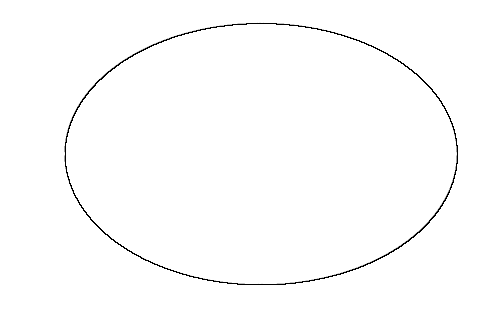

In [3]:
from parsing import *
from plotter import *

print("Now drawing the network graph of users.")
print("Each node represents a user, and each edge represents an interaction between them.\n\n")

plotter = Plotter()
plotter.networkGraph(CensusReader("data/CometLanding_refined.csv").data)